In [4]:
import pandas as pd
import matplotlib.pyplot as plt

f_expenditure = "Public expenditure on education as percentage of total government expenditure.csv"
f_resiliance = "Resilient and Disadvantaged Students by Country.csv"
f_tuition ="Public Tuition Fees.csv"

resilience_df = pd.read_csv(f_resiliance)
resilience_df = resilience_df.set_index("Country")
disadvantaged_df = resilience_df.drop(["(%)Resilient Disadvantaged Students"],1)
resilience_df = resilience_df.drop(["(%)Low-achieving Disadvantaged Students"],1)
resilience_df.to_csv("Resilient Students.csv")
disadvantaged_df.to_csv("Low Achieving Students.csv")

expenditure_df = pd.read_csv(f_expenditure)
expenditure_df = expenditure_df[["Country","Education level and programe orientation","Institution type","Value"]]
expenditure_df = expenditure_df[expenditure_df["Institution type"] == "All sectors"]
expenditure_df = expenditure_df[expenditure_df["Education level and programe orientation"] == "Total tertiary education (ISCED2011 levels 5 to 8)"]
expenditure_df = expenditure_df[expenditure_df.Country != "OECD - Average"]
expenditure_df = expenditure_df[expenditure_df.Country != "European Union 22 members in OECD"]
expenditure_df = expenditure_df[expenditure_df.Country != "G20"]
expenditure_df = expenditure_df.drop(["Education level and programe orientation","Institution type"], 1)
expenditure_df = expenditure_df.set_index("Country")
expenditure_df = expenditure_df.loc[["Australia","Canada","Chile","Denmark","Finland","France","Italy","Japan","Korea","Norway","Turkey"
                                     ,"Sweden","Switzerland","United States","United Kingdom"]]
expenditure_df.columns = ["Public Expenditure (%)"]
expenditure_df.to_csv("Public Expenditure by Country.csv")
tuition_df = pd.read_csv(f_tuition)
tuition_df = tuition_df.set_index("Country")

res_exp_df = expenditure_df.join(resilience_df)
resdis_exp_df = res_exp_df.join(disadvantaged_df)
dis_exp_df = expenditure_df.join(disadvantaged_df)

dis_fin_df = dis_exp_df.join(tuition_df)
res_fin_df = res_exp_df.join(tuition_df)

resdis_fin_df = resdis_exp_df.join(tuition_df)
resdis_exp_df

df = pd.read_csv("Public Expenditure by Country.csv")
df

,Country,Public Expenditure (%)
0,Australia,3.822
1,Canada,4.610
2,Chile,4.912
3,Chile,5.027
4,Denmark,4.243
5,Finland,3.438
6,France,2.184
7,Italy,1.569
8,Japan,1.788
9,Korea,3.288


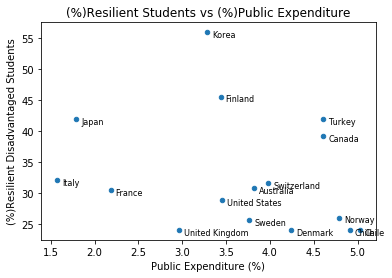

In [16]:
ax = res_exp_df.plot.scatter(x = "Public Expenditure (%)", y = "(%)Resilient Disadvantaged Students")
for k, v in res_exp_df.iterrows():
    ax.annotate(k, v, xytext=(5,-5), textcoords="offset points", fontsize=8)
plt.title("(%)Resilient Students vs (%)Public Expenditure")
plt.show()

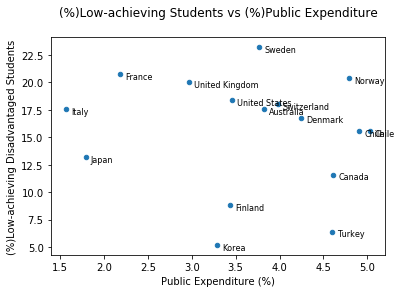

In [73]:
ax = dis_exp_df.plot.scatter(x = "Public Expenditure (%)", y = "(%)Low-achieving Disadvantaged Students")
for k, v in dis_exp_df.iterrows():
    ax.annotate(k, v, xytext=(5,-5), textcoords="offset points", fontsize=8)
plt.title("(%)Low-achieving Students vs (%)Public Expenditure\n")
plt.show()



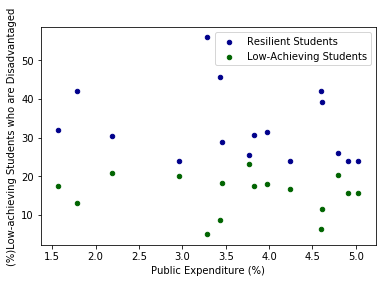

In [67]:
ax2 = resdis_exp_df.plot(kind='scatter',x="Public Expenditure (%)",
                         y="(%)Resilient Students who are Disadvantaged"
                        ,color='DarkBlue',label='Resilient Students');
resdis_exp_df.plot(kind='scatter',x='Public Expenditure (%)'
                   ,y="(%)Low-achieving Students who are Disadvantaged"
                  ,color='DarkGreen',label='Low-Achieving Students',ax=ax2);
plt.show()

In [58]:
resdis_fin_df

,Public Expenditure (%),(%)Resilient Students who are Disadvantaged,(%)Low-achieving Students who are Disadvantaged,Average tuition fees charged by public institutions in USD
Country,,,,
Australia,3.822,30.8,17.6,4763.0
Canada,4.610,39.2,11.6,4939.0
Chile,4.912,24.0,15.6,7654.0
Chile,5.027,24.0,15.6,7654.0
Denmark,4.243,24.0,16.8,0.0
Finland,3.438,45.6,8.8,0.0
France,2.184,30.4,20.8,NaN
Italy,1.569,32.0,17.6,1658.0
Japan,1.788,42.0,13.2,5229.0
